lab 5 Punith 210962012

In [20]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
A = np.array([[2, 1], [1, 3]])
B = np.array([4, 7])

X = np.linalg.inv(A).dot(B)
print("Solution:")
print(X)

Solution:
[1. 2.]


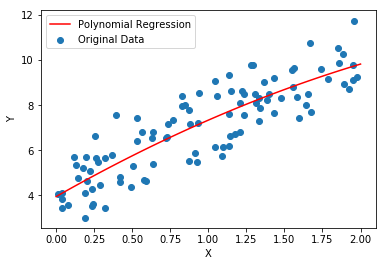

Coefficients:
[[ 0.          3.84100842 -0.45190593]]
Intercept:
[3.95139826]


In [22]:

np.random.seed(0)
X = 2 * np.random.rand(100, 1)
Y = 4 + 3 * X + np.random.randn(100, 1)
# Fit a polynomial regression model
degree = 2 # You can change the degree as needed
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, Y)# Make predictions
X_new = np.linspace(0, 2, 100).reshape(-1, 1)
X_new_poly = poly_features.transform(X_new)
Y_new = model.predict(X_new_poly)
# Plot the original data and the polynomial regression curve
plt.scatter(X, Y, label='Original Data')
plt.plot(X_new, Y_new, 'r-', label='Polynomial Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
# The coefficients of the multivariate polynomial regression model
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:")
print(coefficients)
print("Intercept:")
print(intercept)

Confusion Matrix:
[[19  0]
 [ 0 26]]

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        19
          1       1.00      1.00      1.00        26

avg / total       1.00      1.00      1.00        45



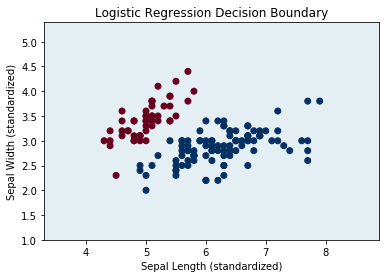

In [23]:


# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2] # We'll use only the first two features for simplicity
y = (iris.target != 0) * 1 # Convert target labels to binary (0 or 1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Create a logistic regression model
model = LogisticRegression(solver='liblinear')
# Train the model
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
plt.xlabel('Sepal Length (standardized)')
plt.ylabel('Sepal Width (standardized)')
plt.title('Logistic Regression Decision Boundary')
plt.show()

1. Suppose you have a gold/silver price dataset with a single independent variable (X) and a dependent variable
(Y). You want to fit a polynomial regression model to this data. Implement the process of selecting the
appropriate degree for the polynomial (e.g., linear, quadratic, cubic) based on the dataset using Python.

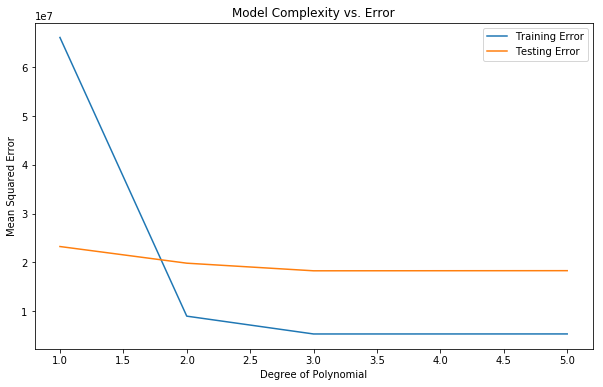

In [26]:
data = pd.read_csv('silver_prices.csv')
years = data['Year'].values
gold_price = data['gprice'].values
X = years.reshape(-1, 1)
Y = gold_price


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

degrees = [1, 2, 3, 4, 5]
train_errors = []
test_errors = []

for degree in degrees:

    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_poly_train, Y_train)

    Y_train_pred = model.predict(X_poly_train)
    Y_test_pred = model.predict(X_poly_test)

    train_error = mean_squared_error(Y_train, Y_train_pred)
    test_error = mean_squared_error(Y_test, Y_test_pred)
    
    train_errors.append(train_error)
    test_errors.append(test_error)


plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Training Error')
plt.plot(degrees, test_errors, label='Testing Error')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.title('Model Complexity vs. Error')
plt.legend()
plt.show()

2. Suppose you have a gold/silver price dataset with a single independent variable (X) and a dependent variable
(Y). You want to fit a logistic regression model to this data. Develop an example code snippet in Python.

In [28]:
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

model = LogisticRegression()
model.fit(X_train, Y_train)

Y_test_pred = model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_test_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.00


3. Imagine you have a gold and silver price dataset with two independent variables (X1 and X2) and a
dependent variable (Y). Implement in python, how you can perform multivariate polynomial regression to
model the relationship between the independent variables and the dependent variabl

In [31]:
data = pd.read_csv('silver_prices.csv')

X1 = data['gprice'].values.reshape(-1, 1)
X2 = data['sprice'].values.reshape(-1, 1)
Y = data['Year'].values


X = np.concatenate((X1, X2), axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

degree = 2

poly_features = PolynomialFeatures(degree=degree)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

model = LinearRegression()
model.fit(X_poly_train, Y_train)

Y_train_pred = model.predict(X_poly_train)
Y_test_pred = model.predict(X_poly_test)

train_error = mean_squared_error(Y_train, Y_train_pred)
test_error = mean_squared_error(Y_test, Y_test_pred)

print("Training Mean Squared Error:", train_error)
print("Testing Mean Squared Error:", test_error)

Training Mean Squared Error: 16.05175031163966
Testing Mean Squared Error: 16.1084710844465


4. Imagine you have a gold and silver price dataset with two independent variables (X1 and X2) and a
dependent variable (Y). Implement in python, how you can perform the logistic regression to model the
relationship between the independent variables and the dependent variable